![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.1.0'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
data = np.load("/content/drive/My Drive/Colab Notebooks/Computer Vision/Assignment/images.npy",allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [ ]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### The values are co-ordinates(upper left and bottom right) ,image width and height

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [ ]:
#Image Settings -

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH,3))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [ ]:
print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224, 3)


In [ ]:
X_train = X[0:400,:,:,:]
y_train = masks[0:400,:,:,:]

Testing data

In [ ]:
X_test = X[400:409,:,:,:]
y_test = masks[400:409,:,:,:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 224, 224, 3)
(400, 224, 224, 3)
(9, 224, 224, 3)
(9, 224, 224, 3)


### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.52156866  0.41176474  0.10588241]
  [ 0.51372552  0.4039216   0.09803927]
  [ 0.51372552  0.4039216   0.09803927]
  ...
  [ 0.10588241 -0.01960784 -0.21568626]
  [ 0.11372554 -0.01176471 -0.19999999]
  [ 0.10588241 -0.01960784 -0.19999999]]

 [[ 0.52156866  0.41176474  0.10588241]
  [ 0.51372552  0.4039216   0.09803927]
  [ 0.51372552  0.4039216   0.09803927]
  ...
  [ 0.09803927 -0.02745098 -0.2235294 ]
  [ 0.10588241 -0.01960784 -0.21568626]
  [ 0.09019613 -0.03529412 -0.20784312]]

 [[ 0.52941179  0.41960788  0.11372554]
  [ 0.52941179  0.41960788  0.11372554]
  [ 0.52941179  0.41960788  0.11372554]
  ...
  [ 0.09019613 -0.03529412 -0.23137254]
  [ 0.09019613 -0.03529412 -0.23137254]
  [ 0.082353   -0.04313725 -0.23921567]]

 ...

 [[-0.01176471  0.3176471   0.37254906]
  [ 0.02745104  0.30980396  0.34901965]
  [ 0.01176476  0.24705887  0.27058828]
  ...
  [-0.86666667 -0.85882354 -0.88235295]
  [-0.93725491 -0.81960785 -0.80392158]
  [-0.02745098  0.06666672  0.082353  ]]

 [

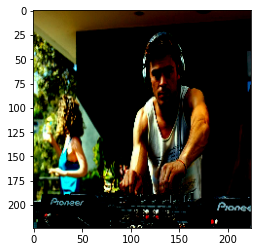

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[399])
img_array = np.array(X_train[399])
print(img_array)

Print the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


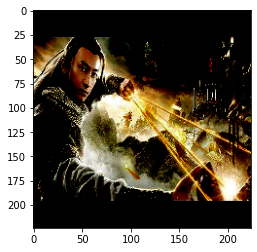

In [ ]:
plt.imshow(X_train[21])

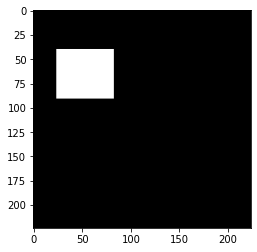

In [ ]:
plt.imshow(masks[21])

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
#Install segmentation models
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-hiepftrv
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-hiepftrv
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33791 sha256=dc66f913024ffc06dfca4e41c5d692658e9bffefbd26e5b19e7ece51de3e184b
  Stored in directory: /tmp/pip-ephem-wheel-cache-63qtjs8c/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [ ]:
#Importing libraries
import segmentation_models
segmentation_models.set_framework('tf.keras')
from segmentation_models import Unet
from segmentation_models.backbones.backbones_factory import Backbones
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

        
    N = X_train.shape[-1]
  
    base_model = Unet(backbone_name='mobilenet', encoder_weights='imagenet')
    inp = Input(shape=(224, 224, N))
    l1 = Conv2D(3, [1, 1])(inp) # map N channels data to 3 channels
    out = base_model(l1)
    l2 = Conv2D(3, [1, 1])(out)
    model1 = Model(inp, l2, name=base_model.name)
    return model1

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model = create_model(False)

### Print model summary (2 marks)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_296 (Conv2D)          (None, 224, 224, 3)       12        
_________________________________________________________________
model_8 (Model)              multiple                  8336337   
_________________________________________________________________
conv2d_297 (Conv2D)          (None, 224, 224, 3)       6         
Total params: 8,336,355
Trainable params: 8,312,483
Non-trainable params: 23,872
_________________________________________________________________


### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.math.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5,min_delta=0.01)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=1, verbose=1,callbacks=[stop])

Train on 400 samples, validate on 9 samples
Epoch 1/100
400/400 [==============================] - 11s 28ms/sample - loss: nan - dice_coefficient: 3.0007 - val_loss: nan - val_dice_coefficient: -0.0843
Epoch 2/100
400/400 [==============================] - 11s 28ms/sample - loss: nan - dice_coefficient: 0.0457 - val_loss: nan - val_dice_coefficient: 0.0543
Epoch 3/100
400/400 [==============================] - 11s 28ms/sample - loss: nan - dice_coefficient: -0.7964 - val_loss: nan - val_dice_coefficient: -0.4603
Epoch 4/100
400/400 [==============================] - 11s 28ms/sample - loss: nan - dice_coefficient: -1.0094 - val_loss: nan - val_dice_coefficient: 0.3581
Epoch 5/100
400/400 [==============================] - 11s 28ms/sample - loss: nan - dice_coefficient: 1.0176 - val_loss: 2.9957 - val_dice_coefficient: 0.6542
Epoch 6/100
400/400 [==============================] - 11s 28ms/sample - loss: nan - dice_coefficient: 0.3044 - val_loss: nan - val_dice_coefficient: -0.3905
Epoch 

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

9/9 [==============================] - 0s 6ms/sample - loss: 1.0408 - dice_coefficient: 0.9797


[1.040814995765686, 0.97968453]

### Get the predicted mask for a test image   (3 marks)

Show the test image

In [ ]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)


9/9 [==============================] - 0s 4ms/sample


Show original mask for test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


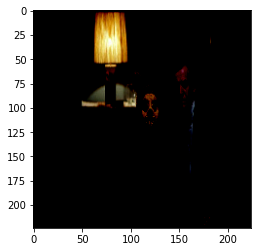

In [ ]:
plt.imshow(X_test[1])

Predict the mask on the test image

In [ ]:
plt.imshow(preds_test[1])

In [ ]:
preds_test[0].shape

(224, 224, 3)

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


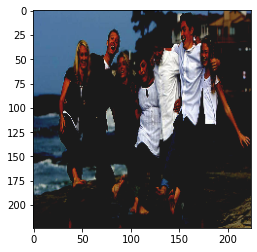

In [ ]:
plt.imshow(X_test[2],alpha=0.9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


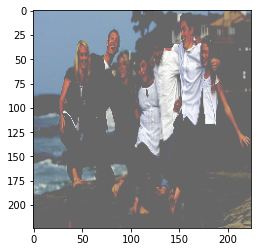

In [ ]:
plt.imshow(X_test[2],alpha=0.6)